In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_names = ["cnn_simclr_results" + str(i) + ".json" for i in range(2)]
results = list()
for file_name in file_names:
    with open(file_name, 'r') as f:
        results.append(json.load(f))

In [3]:
patient_list = [int(x.split("=")[1]) for x in results[0].keys()]

In [10]:
sup_test_acc = np.mean(np.array([[x['sup_res']['test_kappa'] for x in results[i].values()] for i in range(len(file_names))]), 0)
log_test_acc = np.mean(np.array([[x['logistic_res']['test_kappa'] for x in results[i].values()] for i in range(len(file_names))]), 0)
tuned_test_acc = np.mean(np.array([[x['fully_tuned_res']['test_kappa'] for x in results[i].values()] for i in range(len(file_names))]), 0)

In [11]:
import matplotlib
matplotlib.rcParams['font.size']

14.0

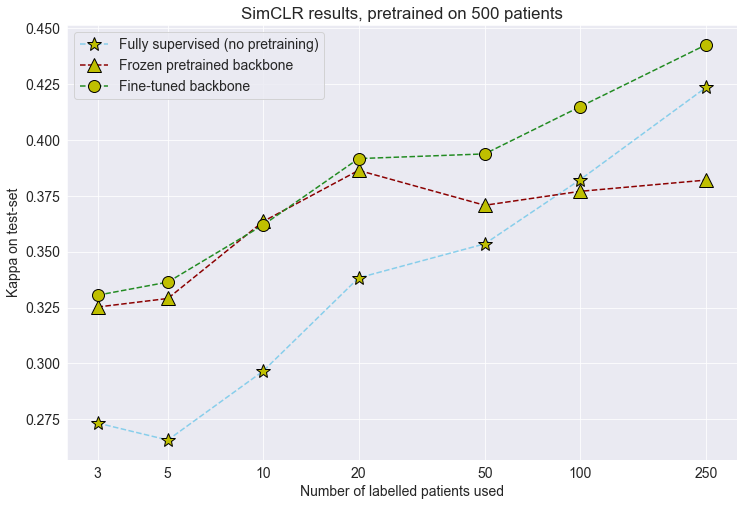

In [12]:
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(12,8))
plt.plot(patient_list, sup_test_acc, '--', color="skyblue", marker="*", markeredgecolor="#000", markerfacecolor="y", markersize=14)
plt.plot(patient_list, log_test_acc, '--', color="darkred", marker="^", markeredgecolor="#000", markerfacecolor="y", markersize=14)
plt.plot(patient_list, tuned_test_acc, '--', color="forestgreen", marker="o", markeredgecolor="#000", markerfacecolor="y", markersize=12)
plt.xscale("log")
plt.xticks(patient_list, labels=patient_list)
plt.title("SimCLR results, pretrained on 500 patients")
plt.xlabel("Number of labelled patients used")
plt.ylabel("Kappa on test-set")
plt.minorticks_off()
plt.legend(["Fully supervised (no pretraining)", "Frozen pretrained backbone", "Fine-tuned backbone"])
plt.savefig('simclr_graph_kappa.png', facecolor="white")
plt.show()